# Predicting heart disease using ML

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine model capable of predicting whether or not someone has heart disease based on their medical attributes

## What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as **multi-class classification**.

## What we'll end up with¶
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="../images/ml101-6-step-ml-framework.png" width=500/> |
|:--:|
| 6 Step Machine Learning Modelling Framework ([read more](https://whimsical.com/9g65jgoRYTxMXxDosndYTB)) |

More specifically, we'll look at the following topics.
* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn 
for machine learning and modelling tasks

| <img src="../images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/>|
|:--:|
|Tools which can be used for each step of the machine learning modelling process.|

**We're going to take the following approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).\
This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.


In a statement, 
> Given clinical parameters about patients, can we predict whether or not they has heart disease?

## 2. Data


What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features 

TFeatures are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Prepare tools

In [1]:
# Import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluations 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

# Data Exploration (exploratory data analysis or EDA)

The goal is to find out more about the data and become a subject matter export on dataset we're working with
   1. What question(s) are we trying resolve ? 
   2. What kind of data do we have and how do we treat different types? 
   3. What's missing from data and how do we deal with it?
   4. Where are the outliers and why should we care about them?
   5. How do we add, change or remove features to get more out of data ?

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.shape

(303, 14)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Let's find out how many of each class there
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

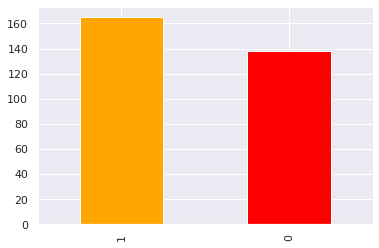

In [7]:
heart_disease["target"].value_counts().plot.bar(color=["orange","red"])

In [8]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency

#### according to Sex 

In [11]:
heart_disease["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

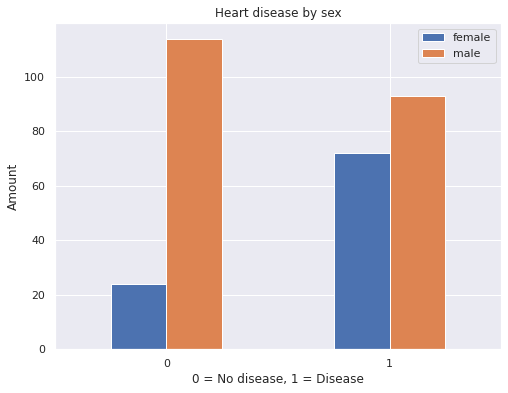

In [13]:
# Create a plot of crosstab
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar", figsize=(8,6))
plt.title("Heart disease by sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0)

#### according to sex and thalach

In [14]:
heart_disease.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [15]:
heart_disease["thalach"].mean()

149.64686468646866

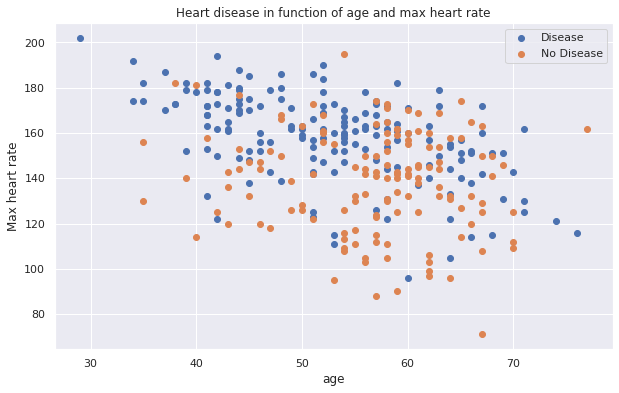

In [16]:
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease["target"] == 1], 
            heart_disease.thalach[heart_disease["target"]==1])
plt.scatter(heart_disease.age[heart_disease["target"] == 0], 
            heart_disease.thalach[heart_disease["target"]==0])

# Add some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"])

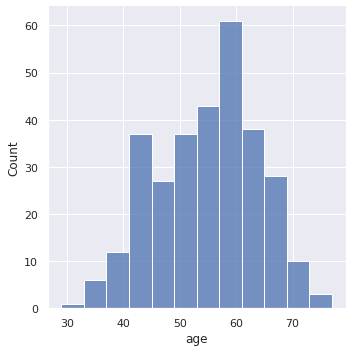

In [17]:
# Check distribution function of age
sns.displot(heart_disease.age)

#### Heart disease frequency per Chest Pain type

In [18]:
heart_disease.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [19]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


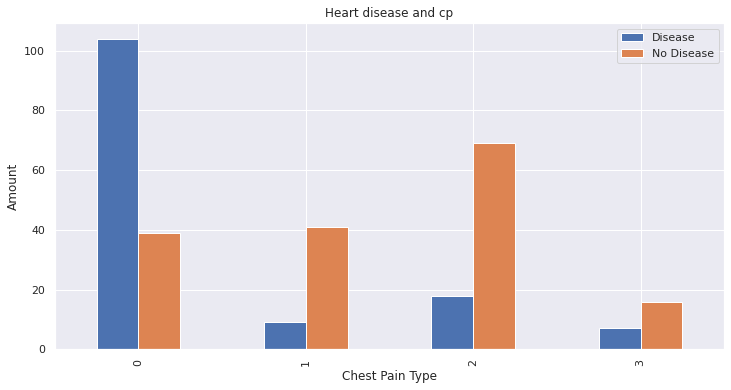

In [20]:
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar", figsize=(12,6))
plt.title("Heart disease and cp")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])

In [21]:
# Make a correlation matrix 
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

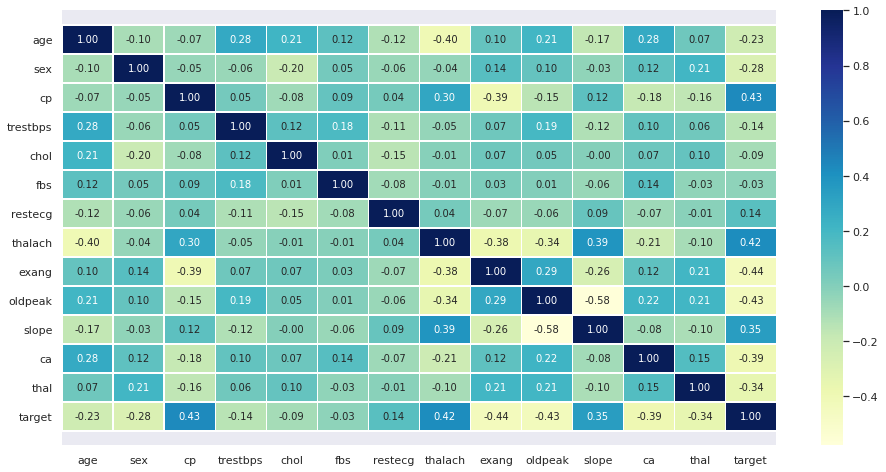

In [22]:
# Let's make out correlation matrix a litte prettier
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(corr_matrix, annot=True ,cbar=True,linewidths=0.5, linecolor="white",fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom+0.5, top -0.5)

## Modelling

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into features and labels (x,y)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [25]:
# setup random seed
np.random.seed(42)
# Split data into trainning and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

We are going to try 3 different machine learning models: 
1. LogisticRegression
2. KNeighborClassifier
3. RandomForestsClassifier

In [26]:
# Puts model in dictionaries
models = {"Logistic Regression" : LogisticRegression() ,
          "K-Nearest Neighbor Classifier" : KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier()
         }

# Create a function to fit and score models 
def fit_and_score_model(models, x_train, x_test, y_train, y_test) : 
    """
    Fits and evaluate given machine learning models.
    models: a dict of difference Scikit-learn machine learning models
    x_train: trainning data (no labels)
    x_test: testing data(no labels)
    y_train: trainning labels
    y_test: testing labels    
    """
    
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items() :
        # Fit the model to data
        model.fit(x_train, y_train)
        # evaluate model and write down model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores    
    


In [27]:
model_scores = fit_and_score_model(models, x_train, x_test, y_train, y_test)
model_scores

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbor Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model comparison

<AxesSubplot:>

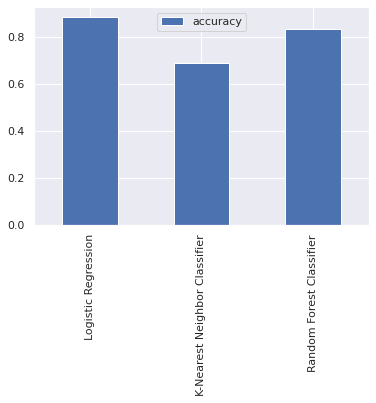

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot(kind="bar")

Now we have got a baseline models. However, we knew a model's first predictions aren't always what we should expect, we should based our next steps off. What should we do ? 
Let's  look a following steps : 
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. precision
6. recall
7. f1 score
8. Classification report 
9. ROC curve
10. Area under the curve (AUC)

## Hyperparameter tuning ( by hand)

In [29]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list different values for n_neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors : 
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    # Append train score into train_scores
    train_scores.append(knn.score(x_train,y_train))
    # Append test score into test_scores    
    test_scores.append(knn.score(x_test, y_test))
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data: 75.41%


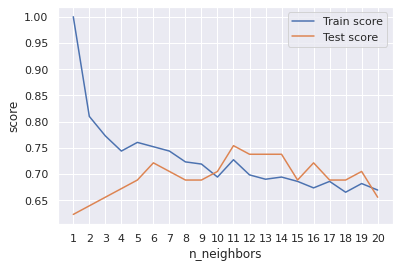

In [30]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21))
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()

print(f"Maximum KNN score on the test data: {np.max(test_scores)*100:.2f}%")

### Use GridSearchCV to knn

### Hyperparameter tunning with RandomizedSearchCV 

We are going to tune: 
* Logistic Regression
* Random Forest Classifier

In [38]:
# create hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear"], 
}

# create hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth" : [None, 3,5,10],
    "min_samples_split" : np.arange(2,20,1),
    "min_samples_leaf" : np.arange(1,20,1),
    "max_features" : ["auto","log2",]
}

In [32]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_res = RandomizedSearchCV(LogisticRegression(),log_reg_grid, cv=5, n_iter=20, verbose=2)
rs_log_res.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.0018329807108324356 .......................
[CV] ........ solver=liblinear, C=0.0018329807108324356, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.004832930238571752 ........................
[CV] .

[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [33]:
rs_log_res.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_res.score(x_test,y_test)

0.8852459016393442

Now we tune RandomForestClassifier(), let's do the same as LogistcRegression()

In [39]:
# setup random hyperparameter search for RandomForestClassifier
rs_clf = RandomizedSearchCV(RandomForestClassifier(),rf_grid, cv=5, n_iter=20, verbose=2)
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3, total=   1.4s
[CV] n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3, total=   1.3s
[CV] n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3 
[CV]  n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3, total=   1.4s
[CV] n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3 
[CV]  n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3, total=   1.5s
[CV] n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3 
[CV]  n_estimators=810, min_samples_split=18, min_samples_leaf=2, max_features=log2, max_depth=3, total=   1.4s
[CV] n_estimators=310, min_samples_split=18, min_samples_leaf=8, max_features=auto, max_depth=5 
[CV]  n_estimators=310, min_samples_split=18, min_samples_leaf=8, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=310, min_samples_split=18, min_sam

[CV]  n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5, total=   0.7s
[CV] n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5 
[CV]  n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5, total=   1.0s
[CV] n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5 
[CV]  n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5, total=   1.0s
[CV] n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5 
[CV]  n_estimators=410, min_samples_split=19, min_samples_leaf=10, max_features=log2, max_depth=5, total=   1.0s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=2, max_features=auto, max_depth=5, total=   2.1s
[CV] n_estimators=910, min_samples_split=18, 

[CV]  n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10 
[CV]  n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10 
[CV]  n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10 
[CV]  n_estimators=860, min_samples_split=7, min_samples_leaf=8, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=60, min_samples_split=12, min_samples_leaf=17, max_features=auto, max_depth=3 
[CV]  n_estimators=60, min_samples_split=12, min_samples_leaf=17, max_features=auto, max_depth=3, total=   0.1s
[CV] n_estimators=60, min_samples_split=12, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [40]:
rs_clf.best_params_

{'n_estimators': 210,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 5}

In [41]:
rs_clf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Since out LogisticRegression model provides the best scores so far, we'll try and improve them again usin GridSearchCV

In [47]:
# Difference hyperparameter for out LogisticRegression model
log_reg_grid = {
    "C" : np.logspace(-4,4,30),
    "solver" : ["liblinear"],
}

gs_log_reg = GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=2)
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, solver=liblinear .......................
[CV] ........ C=0.0012689610031679222, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] ......... C=0.002395026619987486, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, solver=liblinear ........................
[CV] .

[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=4.893900918477489, solver=liblinear ...........................
[CV] ............ C=4.893900918477489, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] ............ C=9.236708571873866, solver=liblinear, total=   0.0s
[CV] C=9.236708571873866, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [48]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

### Evaluating our tuned ML model, beyond accuracy
* ROC curve and AUC
* matrix confusion
* classification report
* precision
* recall
* f1-score

... and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trainned model, first we need to make predictions

In [53]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [56]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Import ROC curve function from the sklearn

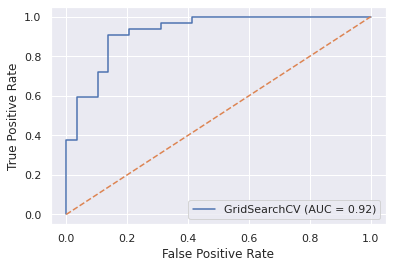

In [59]:

plot_roc_curve(gs_log_reg, x_test, y_test)
plt.plot([0,1],[0,1],"--")

### Confusion matrix

array([[25,  4],
       [ 3, 29]])

(2.5, -0.5)

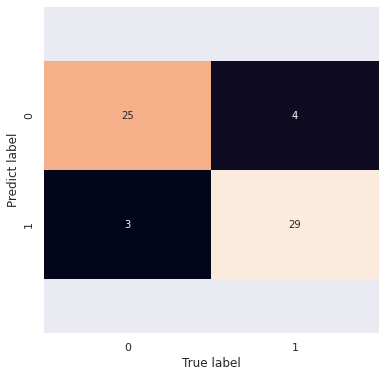

In [69]:
fig, ax = plt.subplots(figsize=(6,6))
ax= sns.heatmap(confusion_matrix(y_test, y_preds), annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predict label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### Classification report 

In [71]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calcualate evaluation metrics using cross-validation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll using `cross_val_score()`

In [73]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [87]:
# Create a new classifier with best parameters
np.random.seed(42)
clf = LogisticRegression(C= 0.20433597178569418, solver="liblinear")

cross_val_score(clf, x_train, y_train, cv=5, )

array([0.81632653, 0.85714286, 0.8125    , 0.85416667, 0.8125    ])

In [88]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,x_train, y_train, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8305272108843538

In [89]:
# Cross-validation precision
cv_pre = cross_val_score(clf,x_train, y_train,scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8156825852946541

In [92]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf, x_train, y_train, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8527860395821953

In [95]:
# Cross-validation Recall 
cv_recall = cross_val_score(clf, x_train, y_train, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8945868945868944

<AxesSubplot:>

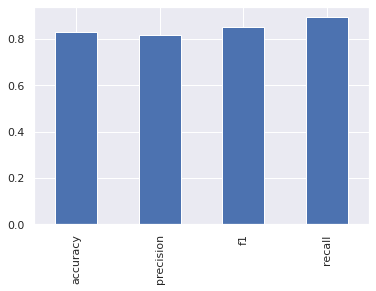

In [102]:
# Visualize cross-validation metrics
cv_metrics = {"accuracy" : cv_acc,
              "precision" : cv_pre,
              "f1" : cv_f1,
               "recall" : cv_recall
            }
df = pd.DataFrame(cv_metrics, index=["value"])
df.T.plot(kind="bar", legend=False)

## Features impotance

Features importance is another as asking, "which features contributed most to the outcomes of the models and how did they contribute ?" 

Finding feature importance is different from each of machine learning model. One way to find feature importance is to search for (MODEL NAME) fearture importance



In [103]:
# Fit an istance of LogisticRegression
clf = LogisticRegression(C= 0.20433597178569418, solver="liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [122]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [123]:
features_dict = dict(zip(heart_disease.columns.values, np.transpose(clf.coef_)) )


{'age': array([0.00320769]),
 'sex': array([-0.86062049]),
 'cp': array([0.66001432]),
 'trestbps': array([-0.01155971]),
 'chol': array([-0.00166496]),
 'fbs': array([0.04017236]),
 'restecg': array([0.31603405]),
 'thalach': array([0.02458922]),
 'exang': array([-0.60470171]),
 'oldpeak': array([-0.56795456]),
 'slope': array([0.45085392]),
 'ca': array([-0.63733328]),
 'thal': array([-0.67555094])}

<AxesSubplot:>

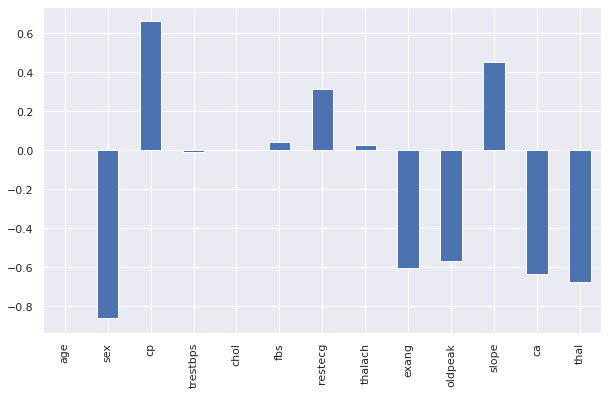

In [129]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict)
features_df.T.plot(kind="bar", legend=False, figsize=(10,6))

(14.2, -0.2)

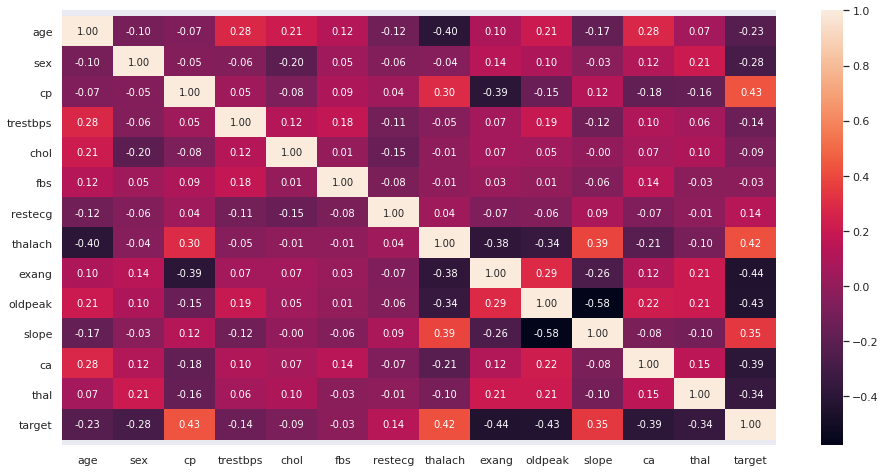

In [139]:
# getting again correlation
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(heart_disease.corr(), annot=True, fmt=".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.2,top-0.2)

In [141]:
pd.crosstab(heart_disease.sex, heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


In [144]:
# slope - the slope of the peak exercise ST segment
# 0: Upsloping: better heart rate with excercise (uncommon)
# 1: Flatsloping: minimal change (typical healthy heart)
# 2: Downslopins: signs of unhealthy heart
pd.crosstab(heart_disease.slope, heart_disease.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

#### What next?

You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of `LogisticRegression`) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into [CatBoost](https://catboost.ai/) or [XGBoost](https://xgboost.ai/).

* Could you improve the current models (beyond what we've done so far)?
* If your model is good enough, how would you export it and share it with others? (Hint: check out [Scikit-Learn's documentation on model persistance](https://scikit-learn.org/stable/modules/model_persistence.html))

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.